<a href="https://colab.research.google.com/github/iurykischka/Proc.-de-sinais/blob/master/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt, IPython.display as ipd
from scipy.io import wavfile
from scipy import signal
import requests

# Som do beat
response = requests.get('https://github.com/iurykischka/Proc.-de-sinais/blob/master/untitled.wav?raw=true')
open("untitled.wav", "wb").write(response.content)
fs, beat = wavfile.read('untitled.wav')
beat = beat[:,0] # sinal do beat

tempo = np.arange(len(beat))/fs # variável TEMPO (em segundos)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == '__main__':


In [13]:
ipd.Audio(beat, rate=fs, normalize=True)

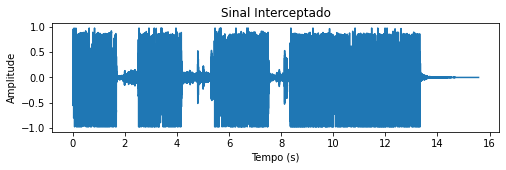

In [14]:
T = 1/fs
N=len(beat)
t1 = np.arange(0, N*T, T) #vetor de tempo (segundos)
# tempo = np.linspace(0, T, 1)
plt.figure(figsize=(8,2))
plt.plot(t1, beat);
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal Interceptado");

In [15]:
import numpy as np, matplotlib.pyplot as plt, scipy as sp
from scipy import signal

def serieFourier(x, t, Hz=False, dB=False, deg=False, Nfft=None):
    N = len(x)
    T = np.mean(t[1:]-t[:-1])
        
    if Nfft==None: Nfft=N
        
    Xk = sp.fft.fft(x, Nfft) 
    Xk = Xk/min(N,Nfft) 
    Xk = Xk[:Nfft//2] 
    Xk[1:] = 2*Xk[1:] 
    Xk_mag  = np.abs(Xk)
    if dB: Xk_mag = 20*np.log10(Xk_mag)
    Xk_pha = np.angle(Xk, deg=deg)

    # Calculo das frequencias
    f0 = 2*np.pi/(Nfft*T) # rad/s
    freqs = np.arange(0.,(Nfft//2)*f0, f0)
    freqs = freqs[0:Nfft//2]
    if Hz: freqs /= 2*np.pi
    
    return Xk_mag,Xk_pha,freqs

#Calcular a FFt
def plotFFT(x, t, Hz=True, db=False):
    Xk_mag,Xk_pha,freqs = serieFourier(x, t, Hz=Hz, dB=db, deg=True, Nfft=None)
    if db:
        plt.semilogx(freqs,Xk_mag)
    else:
        plt.plot(freqs,Xk_mag)
        
    if Hz:
        plt.xlabel("Frequencia(Hz)")
    else:
        plt.xlabel("Frequencia(rad/Amostra)")
    
    plt.ylabel("Módulo")
    plt.grid(which="both")
    
    return

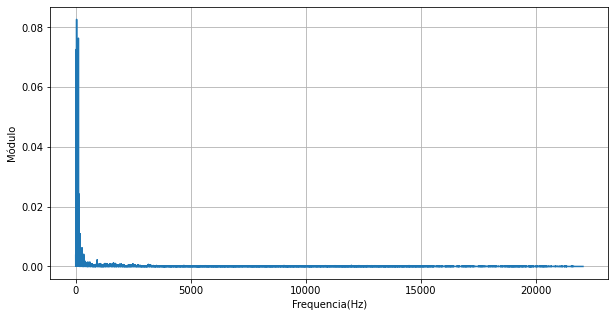

In [25]:
# mag1, pha1, f1 = fourier(beat, t1, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia

# plt.figure(figsize=(10,5));
# plt.plot(f1, mag1);
# plt.title("Resposta em frequência - Módulo");
# plt.ylabel("amplitude");
# plt.xlabel("$f$ (Hz)");
# plt.xlim(0,8000)
# plt.grid(1);


plt.figure(figsize=(10,5))
plotFFT(beat, t1)


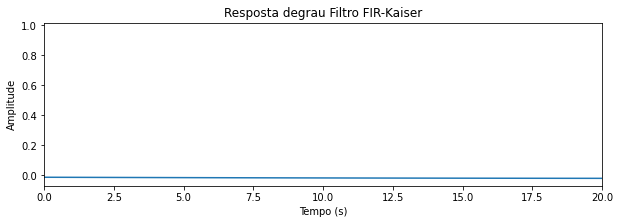

In [102]:
Ap = 1
Ar = 0.001
Gp = -Ap
Gr = -Ar
dp = 1 - 10**(Gp/20)
dr = 10**(Gr/20)#
delta = min(dp,dr) #Ripple
delta_db = 20*np.log10(delta)
fp = 800 #freq de passagem
fr = 100 #freq de corte
ftr = (fp-fr) #faixa transição
ftr_norm = ftr/(fs/2) #freq de transição normalizado
fc = np.mean((fr,fp)) #frequencia de corte em hz
ws = 2*np.pi*fs #frequencia em rad/s
Wp = 2*np.pi*fp #passagem em rad/s
Wr = 2*np.pi*fr #rejeição e rad/s

#Filtro Kaiser
ordemFIR, beta = signal.kaiserord(ripple=delta_db, width=ftr_norm)

b = signal.firwin(numtaps=ordemFIR, cutoff = fc, width=ftr , window = ('kaiser', beta), pass_zero="highpass", fs=fs)
plt.figure(figsize=(10,3))
plt.xlim((0,20))
plt.plot(b)
plt.title("Resposta degrau Filtro FIR-Kaiser")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

sys_FIR = signal.dlti(b, 1, dt=1/fs)
w_1, mag_1, pha_1= signal.dbode(sys_FIR, n=2**10)
f_1 = w_1/2/np.pi
a_1, grd_1 = signal.group_delay((b,1), fs=fs)

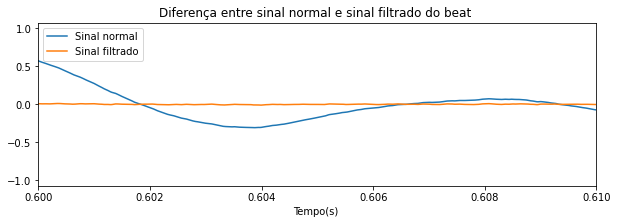

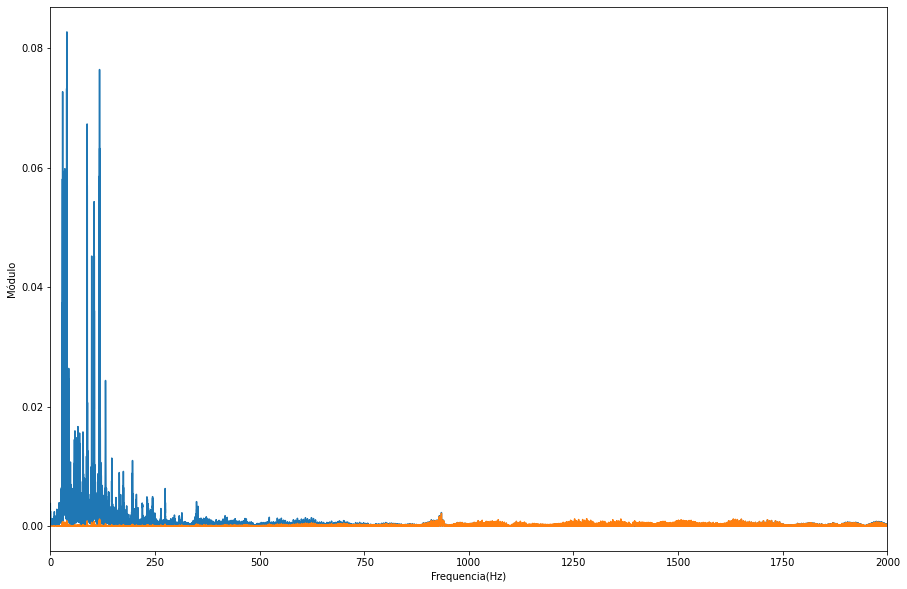

In [104]:
atraso = np.mean(grd_1)/fs
tempo_atraso = tempo-atraso

beat_y = signal.filtfilt(b, 1, beat) 

plt.figure(figsize=(10,3))
plt.plot(tempo, beat,label = "Sinal normal")
plt.plot(tempo, beat_y,label = "Sinal filtrado" )
plt.title("Diferença entre sinal normal e sinal filtrado do beat ")
plt.xlabel("Tempo(s) ")
plt.xlim((0.6,0.61))
legend = plt.legend(loc='upper left')

#Pós filtro
plt.figure(figsize=(15,10))
plotFFT(beat, tempo, Hz=True, db=False)
plotFFT(beat_y, tempo_atraso, Hz=True, db=False)
plt.xlim((0,2000));

ipd.Audio(beat_y, rate=fs, normalize=True)

In [17]:
#Especificações do Filtro

Gp = -1.32 #dB log(Sp^20) = Gp
Gr = -69 #dB
dp = 1-(10**(Gp/20))
dr = 10**(Gr/20)
Ap = -Gp #dB
Ar = -Gr #dB
fp1 = 62 #Hz
fp2 = 144 #Hz
fr1 = 37 #Hz
fr2 = 198 #Hz

wp1 = fp1*(2*np.pi) #rad/s
wp2 = fp2*(2*np.pi) #rad/s
wr1 = fr1*(2*np.pi) #rad/s
wr2 = fr2*(2*np.pi) #rad/s


print("FILTRO do tipo Passa-Faixa")
print(" - Ap: %.2f"%Ap)
print(" - Ar: %.2f"%Ar)
print(" - Gp: %.2f"%Gp)
print(" - Gr: %.2f"%Gr)
print(" - dp: %.2f"%dp)
print(" - dr: %.2f"%dr);

FILTRO do tipo Passa-Faixa
 - Ap: 1.32
 - Ar: 69.00
 - Gp: -1.32
 - Gr: -69.00
 - dp: 0.14
 - dr: 0.00


14 8 8 6


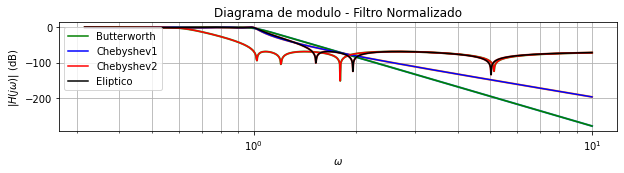

In [18]:
# Ordem dos filtros
ord1, wn1 = signal.buttord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord2, wn2 = signal.cheb1ord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord3, wn3 = signal.cheb2ord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord4, wn4 = signal.ellipord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)

print(ord1, ord2, ord3, ord4)

# Filtros protótipos

z1, p1, k1 = signal.buttap(ord1)
z2, p2, k2 = signal.cheb1ap(ord2, Ap)
z3, p3, k3 = signal.cheb2ap(ord3, Ar)
z4, p4, k4 = signal.ellipap(ord4, Ap, Ar)

sys1ap = signal.lti(z1, p1, k1)
sys2ap = signal.lti(z2, p2, k2)
sys3ap = signal.lti(z3, p3, k3)
sys4ap = signal.lti(z4, p4, k4)

# Bode

w = np.logspace(-0.5, 1, 1000) # vetor de frequencias

w, mag1, phase1 = signal.bode(sys1ap, w)
w, mag2, phase2 = signal.bode(sys2ap, w)
w, mag3, phase3 = signal.bode(sys3ap, w)
w, mag4, phase4 = signal.bode(sys4ap, w)

# Gráfico (módulo)

plt.figure(figsize=(10,2))
plt.semilogx(w, mag1, lw=2) #Butter
plt.semilogx(w, mag2, lw=2) #Cheby 1
plt.semilogx(w, mag3, lw=2) #Cheby 2
plt.semilogx(w, mag4, lw=2) #Elíptico

plt.title("Diagrama de modulo - Filtro Normalizado")
plt.xlabel("$\omega$")
plt.ylabel("$|H(j\omega)|$ (dB)")
plt.grid(which="both")
plt.semilogx(w, mag1,color = "green",label = "Butterworth") 
plt.semilogx(w, mag2,color = "blue",label = "Chebyshev1") 
plt.semilogx(w, mag3,color = "red",label = "Chebyshev2") 
plt.semilogx(w, mag4,color = "black",label = "Eliptico") 
legend = plt.legend(loc='upper left')

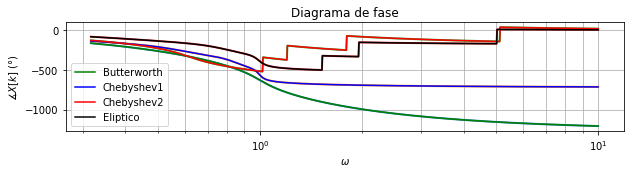

In [19]:
# Gráfico (fase)

plt.figure(figsize=(10,2))
plt.semilogx(w, phase1, lw=2) #Butter
plt.semilogx(w, phase2, lw=2) #Cheby 1
plt.semilogx(w, phase3, lw=2) #Cheby 2
plt.semilogx(w, phase4, lw=2) #Elíptico

plt.title("Diagrama de fase")
plt.xlabel("$\omega$")
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.grid(which="both")
plt.semilogx(w, phase1,color = "green",label = "Butterworth") 
plt.semilogx(w, phase2,color = "blue",label = "Chebyshev1") 
plt.semilogx(w, phase3,color = "red",label = "Chebyshev2") 
plt.semilogx(w, phase4,color = "black",label = "Eliptico") 
legend = plt.legend(loc=3)

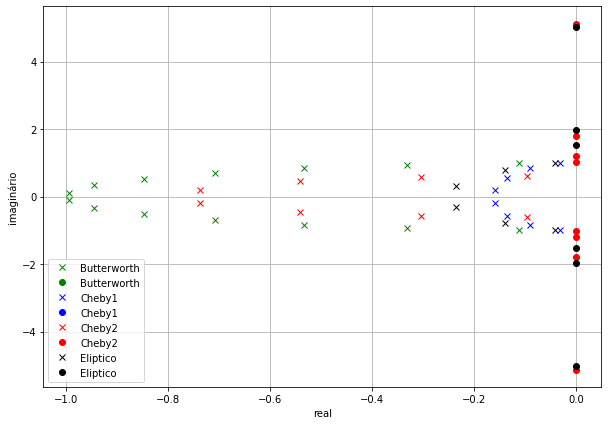

In [20]:
plt.figure(figsize=(10,7))

plt.plot(np.real(p1), np.imag(p1), "gx",label="Butterworth");
plt.plot(np.real(z1), np.imag(z1), "go",label="Butterworth"); 
plt.plot(np.real(p2), np.imag(p2), "bx",label="Cheby1");
plt.plot(np.real(z2), np.imag(z2), "bo",label="Cheby1");
plt.plot(np.real(p3), np.imag(p3), "rx",label="Cheby2");
plt.plot(np.real(z3), np.imag(z3), "ro",label="Cheby2");
plt.plot(np.real(p4), np.imag(p4), "kx",label="Eliptico");
plt.plot(np.real(z4), np.imag(z4), "ko",label="Eliptico");

legend = plt.legend(loc=3)
plt.xlabel("real")
plt.ylabel("imaginário")
#plt.axis([-2,2,-2,2]);
plt.grid(which="both");

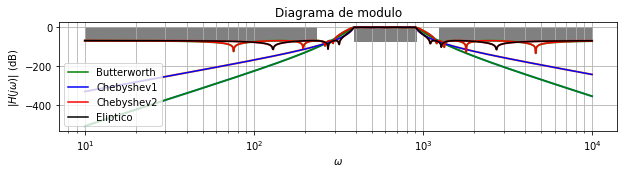

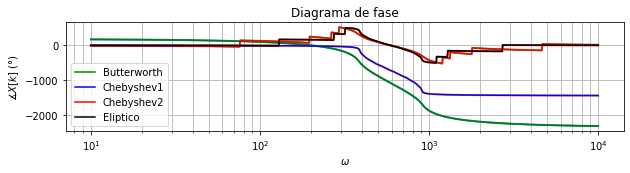

In [21]:
# Filtros

z1, p1, k1 = signal.butter(ord1, wn1, btype='bp', analog=True, output='zpk') #filtro butterworth
z2, p2, k2 = signal.cheby1(ord2, Ap, wn2, btype='bp', analog=True, output='zpk') #filtro chebychev 1
z3, p3, k3 = signal.cheby2(ord3, Ar, wn3, btype='bp', analog=True, output='zpk') #filtro chebychev 2
z4, p4, k4 = signal.ellip(ord4, Ap, Ar, wn4, btype='bp', analog=True, output='zpk') #filtro eliptico

sys1 = signal.lti(z1, p1, k1) 
sys2 = signal.lti(z2, p2, k2)
sys3 = signal.lti(z3, p3, k3)
sys4 = signal.lti(z4, p4, k4)


# Bode

w = np.logspace(1, 4, 1000) #cria o vetor das frequencias

w, mag1, phase1 = signal.bode(sys1, w) #faz o diagrama de bode do sistema do butterworth
w, mag2, phase2 = signal.bode(sys2, w) #faz o diagrama de bode do sistema do chebychev 1
w, mag3, phase3 = signal.bode(sys3, w) #faz o diagrama de bode do sistema do chebychev 2
w, mag4, phase4 = signal.bode(sys4, w) #faz o diagrama de bode do sistema do eliptico

# Gráfico (módulo)

plt.figure(figsize=(10,2))
plt.semilogx(w, mag1, lw=2) #plota o Butterworth
plt.semilogx(w, mag2, lw=2) #plota o Chebychev 1
plt.semilogx(w, mag3, lw=2) #plota o Chebychev 2
plt.semilogx(w, mag4, lw=2) #plota o Elíptico

plt.title("Diagrama de modulo")
plt.xlabel("$\omega$")
plt.ylabel("$|H(j\omega)|$ (dB)")
plt.grid(which="both")
plt.semilogx(w, mag1,color = "green",label = "Butterworth") 
plt.semilogx(w, mag2,color = "blue",label = "Chebyshev1") 
plt.semilogx(w, mag3,color = "red",label = "Chebyshev2") 
plt.semilogx(w, mag4,color = "black",label = "Eliptico") 
legend = plt.legend(loc=3)

# Especificações (gabarito)

# faz sombreados com as especificações do filtro
plt.fill([wp1, wp1, wp2, wp2],[Gr, Gp, Gp, Gr],c="0.5") #cria a sombra da banda passagem
plt.fill([min(w), min(w), wr1, wr1],[Gr, Gp, Gp, Gr],c="0.5") #cria a sombra da banda rejeição 1
plt.fill([wr2, wr2, max(w), max(w)],[Gr, Gp, Gp, Gr],c="0.5") #cria a sombra da banda rejeição 2

plt.grid(1);

# Gráfico (fase)

plt.figure(figsize=(10,2))
plt.semilogx(w, phase1, lw=2) #plota o Butterworth
plt.semilogx(w, phase2, lw=2) #plota o Chebychev 1
plt.semilogx(w, phase3, lw=2) #plota o Chebychev 2
plt.semilogx(w, phase4, lw=2) #plota o Elíptico

plt.title("Diagrama de fase")
plt.xlabel("$\omega$")
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.grid(which="both")
plt.semilogx(w, phase1,color = "green",label = "Butterworth") 
plt.semilogx(w, phase2,color = "blue",label = "Chebyshev1") 
plt.semilogx(w, phase3,color = "red",label = "Chebyshev2") 
plt.semilogx(w, phase4,color = "black",label = "Eliptico") 
legend = plt.legend(loc=3)

In [22]:
tout, yout, xout = signal.lsim(sys4, x, t); #passa o sinal de entrada pelo sistema para resultar na saida

mag1, pha1, f1 = fourier(x, t, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia
magout, phaout, fout = fourier(yout, tout, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia

NameError: ignored

In [ ]:
plt.figure(figsize=(8,2))
plt.plot(f1, mag1)
plt.plot(fout, magout)
plt.title("Resposta em frequência - Módulo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Entrada", "Saída"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);
